# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [174]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [175]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Define Parameters
    params = {
    "q": cities[i],
    "form": "json",
    "units": "metric",
    "appid": weather_api_key    
    }

    # Create endpoint URL with each city
    city_url = requests.get(url, params = params)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | dwarka
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | bargal
City not found. Skipping...
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | korla
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | bismarck
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | igdir
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | adwa
Processing Rec

In [176]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [177]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,24.09,100,20,0.00,TO,1669905964
1,tura,25.5198,90.2201,17.24,89,0,1.66,IN,1669905965
2,lompoc,34.6391,-120.4579,10.99,92,40,2.57,US,1669905965
3,dikson,73.5069,80.5464,-5.08,95,100,8.79,RU,1669905966
4,dwarka,22.2394,68.9678,24.66,56,0,5.56,IN,1669905966


In [178]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [179]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,24.09,100,20,0.00,TO,1669905964
1,tura,25.5198,90.2201,17.24,89,0,1.66,IN,1669905965
2,lompoc,34.6391,-120.4579,10.99,92,40,2.57,US,1669905965
3,dikson,73.5069,80.5464,-5.08,95,100,8.79,RU,1669905966
4,dwarka,22.2394,68.9678,24.66,56,0,5.56,IN,1669905966


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

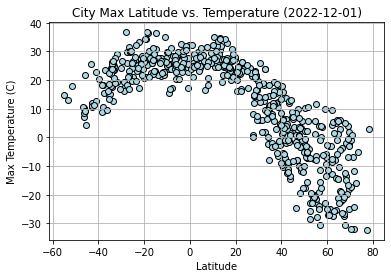

In [180]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Max Latitude vs. Temperature (2022-12-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# how to change facecolor of plot ????

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

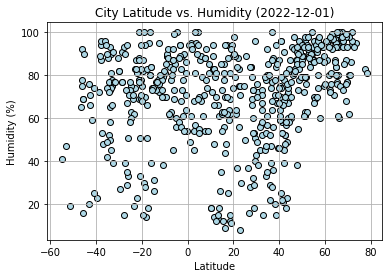

In [181]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Humidity (2022-12-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# how to change facecolor of plot ????

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

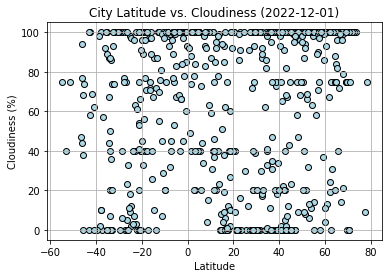

In [182]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness (2022-12-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# how to change facecolor of plot ????

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

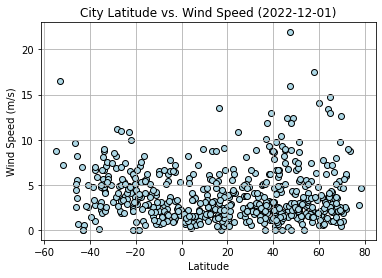

In [183]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y, marker="o", facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed (2022-12-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# how to change facecolor of plot ????

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [184]:
# Define a function to create Linear Regression plots
# Create function
def regression_plot(x, y, y_col, hemi):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="blue", alpha=.5)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,(min(x), min(y)),fontsize=15,color="red")
    plt.xlabel("Latitude (" + hemi + ")")
    plt.ylabel(y_col)
    print('The r-value is: ' + str(rvalue ** 2))
    plt.show()

In [185]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tura,25.5198,90.2201,17.24,89,0,1.66,IN,1669905965
2,lompoc,34.6391,-120.4579,10.99,92,40,2.57,US,1669905965
3,dikson,73.5069,80.5464,-5.08,95,100,8.79,RU,1669905966
4,dwarka,22.2394,68.9678,24.66,56,0,5.56,IN,1669905966
6,khatanga,71.9667,102.5000,-11.78,94,100,5.94,RU,1669905968


In [186]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,24.09,100,20,0.00,TO,1669905964
5,rikitea,-23.1203,-134.9692,23.14,74,63,4.88,PF,1669905967
7,ushuaia,-54.8000,-68.3000,14.81,41,75,8.75,AR,1669905968
11,punta arenas,-53.1500,-70.9167,13.06,47,40,16.46,CL,1669905737
13,isangel,-19.5500,169.2667,26.18,87,100,3.74,VU,1669905972


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7168665977038119


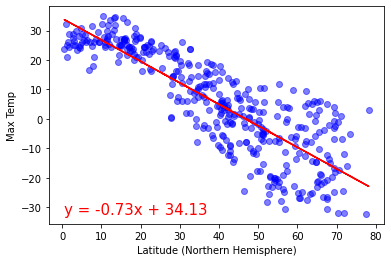

In [187]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', 'Northern Hemisphere')

The r-value is: 0.3413344675319742


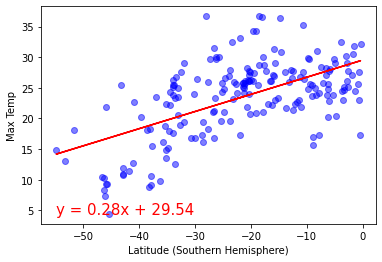

In [188]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', 'Southern Hemisphere')

In [ ]:
# There is a strong negative correlation between latitude and temperature in the northern hemisphere. There is a moderate positive correlation 
# between latitude and temperature in the southern hemisphere. Both cases showing the temperature rising as the latitude approaches the
# equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.138415759253019


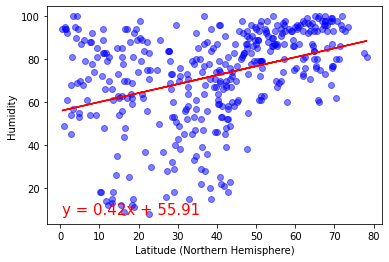

In [189]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', 'Northern Hemisphere')

The r-value is: 0.04216639710965929


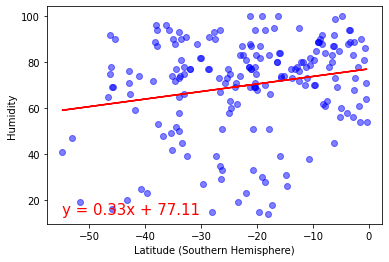

In [190]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', 'Southern Hemisphere')

In [ ]:
# There are weak positive correlations between latitude and humidity in both the northern and southern hemispheres. But, these patterns
# would suggest a discontinuity around the equator, as the northern hemisphere regression would suggest an average humidity ~56 at the 
# equator, while the southern hemisphere regression would suggest an average humidity ~77 at the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04208953631261762


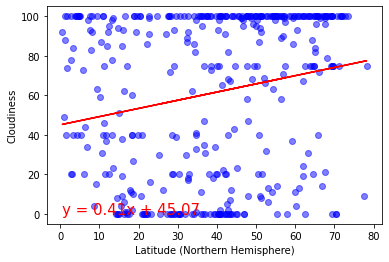

In [191]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', 'Northern Hemisphere')

The r-value is: 0.08925577056246581


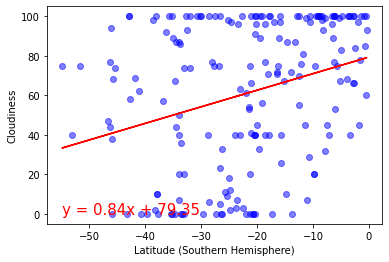

In [192]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', 'Southern Hemisphere')

In [ ]:
# There is an extremely weak positive correlation between latitude and cloudiness in both the northern and southern hemispheres. But, 
# there is a huge spread in the data with cloudiness ranging from approximately 0 to 100 at almost all latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.019227808825366274


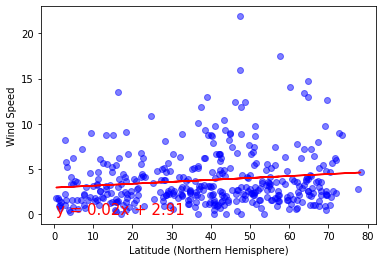

In [193]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 'Northern Hemisphere')

The r-value is: 0.09955764707898788


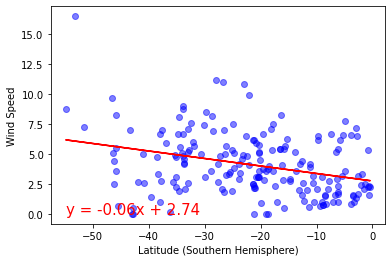

In [194]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', 'Southern Hemisphere')

In [ ]:
# There is a weak positive correlation between latitude and wind speed in the northern hemisphere, as well as a weak negative correlation 
# between latitude and wind speed in the southern hemisphere. Both suggesting that wind speed increases as you move further from the 
# equator (with a somewhat stronger relationship in the southern hemisphere).